In [1]:
pip install pandas scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.1/10.6 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/10.6 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/10.6 MB 1.0 MB/s eta 0:00:11
   - ----------------------------

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [3]:
# Carregar os dados
data = pd.read_csv('drinks.csv')

# Visualizar as primeiras linhas dos dados
print(data.head())



       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol  
0                           0.0  
1                           4.9  
2                           0.7  
3                          12.4  
4                           5.9  


In [5]:
# Selecionar as colunas de interesse para a clusterização
features = data[['beer_servings', 'spirit_servings', 'wine_servings']]

# Padronizar os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


C:\Users\hiran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hiran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


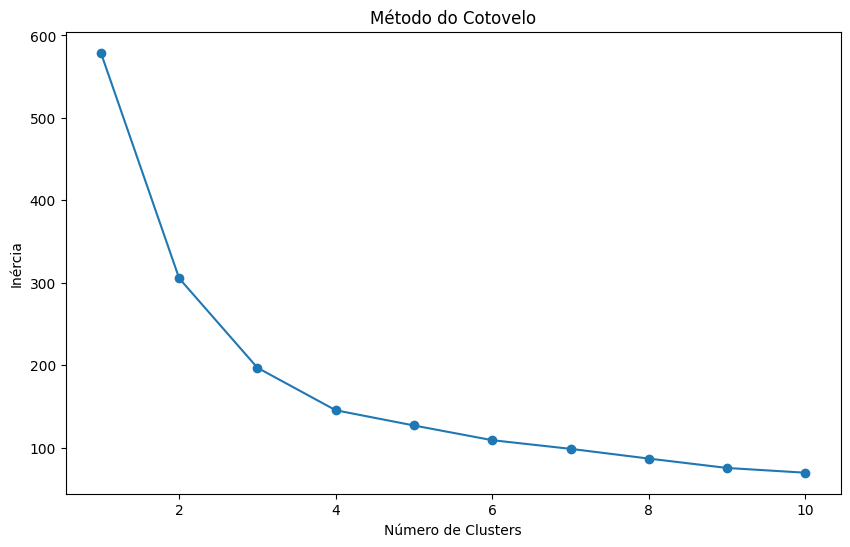

In [6]:
# Método do Cotovelo
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()


In [7]:
# Aplicar o K-means com o número ideal de clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adicionar os rótulos dos clusters aos dados originais
data['Cluster'] = clusters

print(data.head())


       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol  Cluster  
0                           0.0        1  
1                           4.9        0  
2                           0.7        1  
3                          12.4        2  
4                           5.9        2  


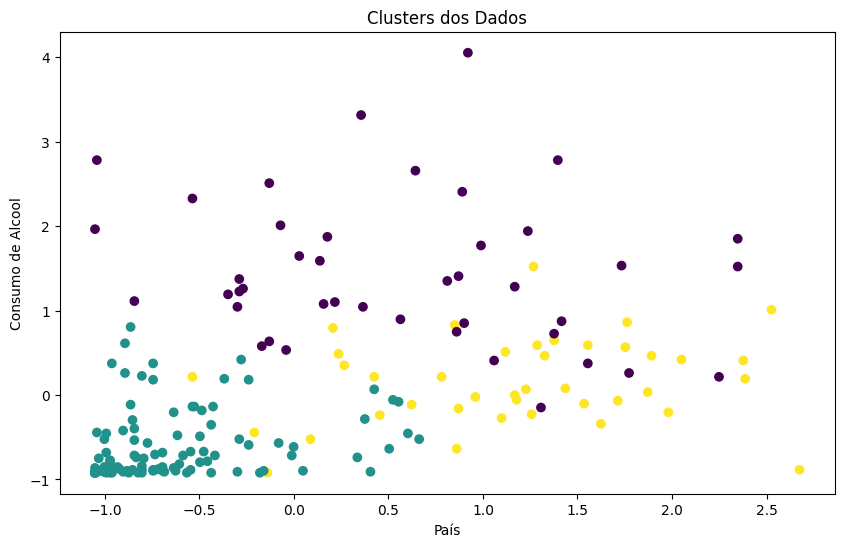

In [17]:
# Plotar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('País')
plt.ylabel('Consumo de Alcool')
plt.title('Clusters dos Dados')
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.5219537802794998


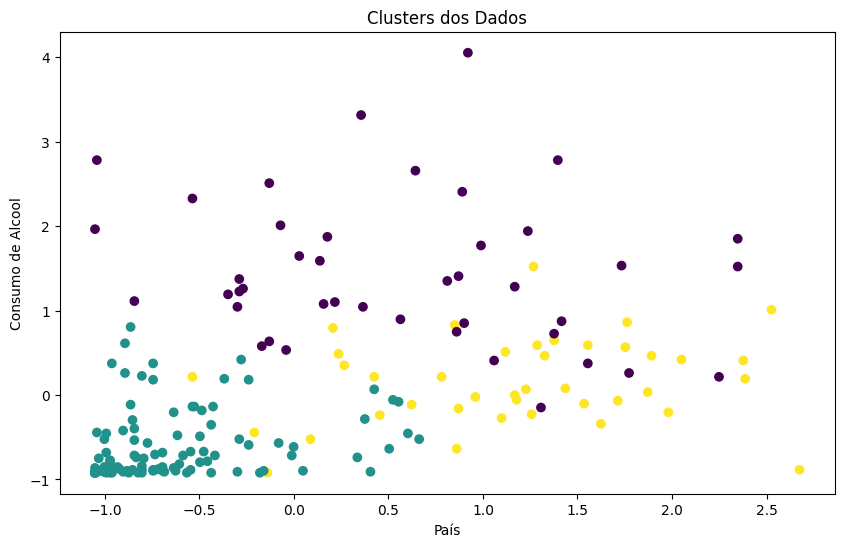

Silhouette Score: 0.5219537802794998
       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol  Cluster  
0                           0.0        1  
1                           4.9        0  
2                           0.7        1  
3                          12.4        2  
4                           5.9        2  


In [15]:
def clusterize_data(file_path, n_clusters):
    # Carregar os dados
    data = pd.read_csv(file_path)
    
    # Selecionar as colunas de interesse para a clusterização
    features = data[['beer_servings', 'spirit_servings', 'wine_servings']]
    
    # Padronizar os dados
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    # Aplicar o K-means com o número ideal de clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    
    # Adicionar os rótulos dos clusters aos dados originais
    data['Cluster'] = clusters
    
    # Plotar os clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('País')
    plt.ylabel('Consumo de Alcool')
    plt.title('Clusters dos Dados')
    plt.show()
    
    # Avaliar a clusterização
    score = silhouette_score(scaled_features, clusters)
    print(f'Silhouette Score: {score}')
    
    return data

# Uso da função
result = clusterize_data('drinks.csv', 3)
print(result.head())
